In [2]:
import sys
sys.path.append('/Users/aimeebarciauskas/Library/Python/3.6/lib/python/site-packages')
sys.path.append('/Users/aimeebarciauskas/Projects/ifsc/')
import psycopg2
import helpers
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from scipy import stats

/Users/aimeebarciauskas/Library/Python/3.6/lib/python/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


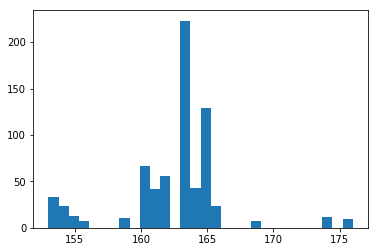

162.42632331902718

In [41]:
# Heights for all female boulderers
rows = helpers.fetch_all(
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    "athletes.height is not NULL and bouldering_comp_results.category = 'womens_bouldering'")
all_wboulder_heights = list(map(lambda row: row[0], rows))

plt.hist(all_wboulder_heights, bins=30)
plt.show()
np.mean(all_wboulder_heights)

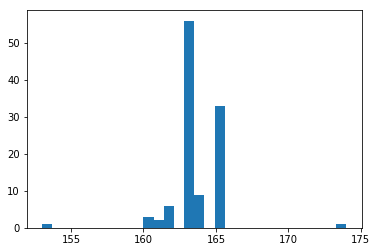

In [17]:
# Heights for female boulderers who finish first
rows = helpers.fetch_all(
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    """
    athletes.height is not NULL and 
    bouldering_comp_results.category = 'womens_bouldering' and 
    bouldering_comp_results.comp_stage_rank = 1
    """)
first_wboulder_heights = list(map(lambda row: row[0], rows))

plt.hist(first_wboulder_heights, bins=30)
plt.show()

In [18]:
mean_all = np.mean(all_wboulder_heights)
mean_firsts = np.mean(first_wboulder_heights)

print('Mean for all women is {0}'.format(mean_all))
print('Mean for women who come in first (both final and semifinal) is {0}'.format(mean_firsts))

Mean for all women is 162.42632331902718
Mean for women who come in first (both final and semifinal) is 163.51351351351352


Null hypothesis: The height of women coming in first place at IFSC bouldering world cups is the same as for all women boulderers.
Alternative hypothesis: The height of women coming in first place at IFSC bouldering world cups is higher than for all women entering the world cup.

In [23]:
# For my own edification
# Reference: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

def var(x):
    numpy_x = np.array(x)
    M = np.mean(numpy_x)
    numer = np.sum((numpy_x - M)**2)
    return numer / len(numpy_x)

def tstat(x, y, N):
    meanx, meany = np.mean(x), np.mean(y)
    varx, vary = var(x), var(y)
    numer = meanx - meany
    denom = np.sqrt((varx / N) + (vary / N))
    return numer / denom

def pvalue(tstat, N):
    df = 2*N - 2
    return 1 - stats.t.cdf(tstat, df = df)

In [28]:
def run_tests(x, y, sample_size=25, ntests=10000):
    pvalues = []
    iter_idx = 0
    while iter_idx <= ntests:
        # Sample populations
        random_sample_x = np.random.choice(x, size=sample_size)
        random_sample_y = np.random.choice(y, size=sample_size)
        #tstat = tstat(random_sample_firsts, random_sample_all, N)
        #pvalue = pvalue(tstat, N)
        # Can sanity check above values with stats.ttest_ind
        t2, p2 = stats.ttest_ind(random_sample_x, random_sample_y, equal_var=False)
        pvalues.append(p2)
        iter_idx += 1
    return pvalues

pvalues = run_tests(all_wboulder_heights, first_wboulder_heights)
np.sum(np.array(pvalues) <= 0.05)/len(pvalues)

0.25237476252374763

Can only reject the null hypothesis that women's heights are different for first place finishers about in about 24% of tests.

## What about only in the final?

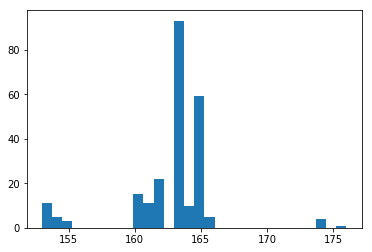

In [20]:
# Heights for all female boulderers in the final
rows = helpers.fetch_all(
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    """
    athletes.height is not NULL and 
    bouldering_comp_results.category = 'womens_bouldering' and 
    bouldering_comp_results.comp_stage = 'final'
    """)
all_wboulder_heights_final = list(map(lambda row: row[0], rows))

plt.hist(all_wboulder_heights_final, bins=30)
plt.show()

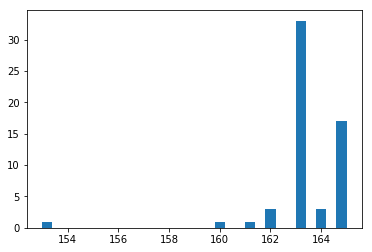

In [21]:
# Heights for all female boulderers in the final
rows = helpers.fetch_all(
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    """
    athletes.height is not NULL and 
    bouldering_comp_results.category = 'womens_bouldering' and 
    bouldering_comp_results.comp_stage = 'final' and
    bouldering_comp_results.comp_stage_rank = 1
    """)
first_wboulder_heights_final = list(map(lambda row: row[0], rows))

plt.hist(first_wboulder_heights_final, bins=30)
plt.show()

In [43]:
mean_all = np.mean(all_wboulder_heights_final)
mean_firsts = np.mean(first_wboulder_heights_final)
print('Mean height for all women in final: {0}'.format(mean_all))
print('Mean for women coming in first in the finals: {0}'.format(mean_firsts))

Mean height for all women in final: 162.7154811715481
Mean for women coming in first in the finals: 163.32203389830508


In [30]:
pvalues = run_tests(all_wboulder_heights_final, first_wboulder_heights_final)
np.sum(np.array(pvalues) <= 0.05)/len(pvalues)

0.1227877212278772

Even less evidence if looking only at the final.

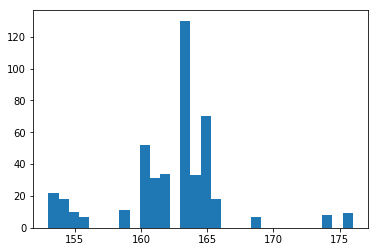

In [44]:
# Heights for all female boulderers in the semifinal
rows = helpers.fetch_all(
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id',
    """
    athletes.height is not NULL and 
    bouldering_comp_results.category = 'womens_bouldering' and 
    bouldering_comp_results.comp_stage = 'semifinal'
    """)
all_wboulder_heights_semifinal = list(map(lambda row: row[0], rows))

plt.hist(all_wboulder_heights_semifinal, bins=30)
plt.show()

In [45]:
mean_final = np.mean(all_wboulder_heights_final)
mean_semifinal = np.mean(all_wboulder_heights_semifinal)

print('Mean height semifinalists: {0}'.format(mean_semifinal))
print('Mean height finalists: {0}'.format(mean_final))

pvalues = run_tests(all_wboulder_heights_final, all_wboulder_heights_semifinal)
np.sum(np.array(pvalues) <= 0.05)/len(pvalues)

Mean height semifinalists: 162.27608695652174
Mean height finalists: 162.7154811715481


0.0740925907409259

<Container object of 5 artists>

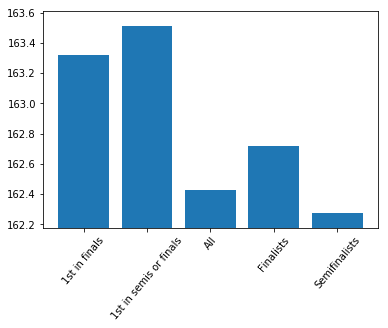

In [76]:
title = 'IFSC World Cup Finalists and Semfinalists Average Height'
averages = {
    'All': np.mean(all_wboulder_heights),
    'Semifinalists': np.mean(all_wboulder_heights_semifinal),
    'Finalists': np.mean(all_wboulder_heights_final),
    '1st in semis or finals': np.mean(first_wboulder_heights),
    '1st in finals': np.mean(first_wboulder_heights_final)
}

keys, values = averages.keys(), averages.values()

plt.ylim((np.mean(all_wboulder_heights_semifinal) - 0.1), np.mean(first_wboulder_heights) + 0.1)
plt.xticks(rotation=50)
plt.bar(keys, values)

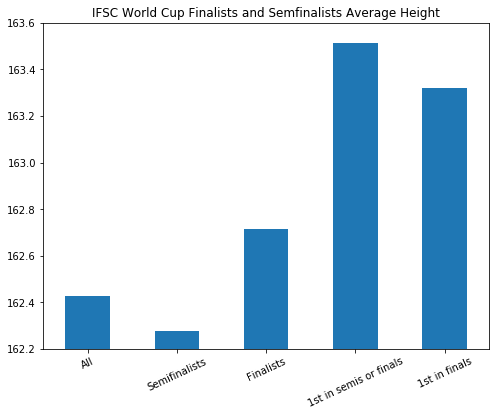

In [95]:
import pandas as pd
df = pd.DataFrame.from_dict(averages, orient = 'index')
barplot = df.plot(kind = 'bar', ylim=[162.2, 163.6], legend=False, title=title, rot=25, figsize=(16,))
barplot.get_figure().savefig("myplot.pdf")